<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/hkton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<해커톤 주제> 04.23일 오후 5시
고객들의 미래 소비를 예측 분석프로젝트를 진행하려 합니다.

고객들의 월별 총 구매 금액을 확인했을 때 
연말에 소비가 많이 이루어지고 있는 것으로 확인이 되었습니다.

그리하여 12월을 대상으로 고객들에게 프로모션을 통해 성공적인 마케팅을 하기 위해 모델을 만들려고 합니다.

온라인 거래 log 데이터는 2009년 12월부터 2011년 11월까지의 온라인 상점의 거래 데이터가 주어집니다.
2011년 11월 까지 데이터를 이용하여 2011년 12월의 고객 구매액 300초과 여부를 예측해야 합니다.

고객들의 구입이 이루어질 때 1개의 데이터가 생성이 되며 데이터에는 

(고객 id / 고객 거주 국가), 상품 정보(상품 id / 상품 설명 / 상품 가격)와 거래 정보(주문 일자 / 상품 수량)

데이터 컬럼 설명
order_id : 주문 번호. 데이터에서 같은 주문번호는 동일 주문을 나타냄
product_id : 상품 번호
description : 상품 설명
quantity : 상품 주문 수량
order_date : 주문 일자
price : 상품 가격
customer_id : 고객 번호
country : 고객 거주 국가
total : 총 구매액(quantity X price)
    
평가 매트릭 :
from sklearn.metrics import roc_auc_score
score = roc_auc_score(labels,preds)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import sklearn as skle
import matplotlib.pyplot as plt
import seaborn as sns
import time
# from pycaret.classification import *

# data = pd.read_csv("./train.csv")
data = pd.read_csv("/content/drive/MyDrive/hackathon/train.csv")

In [8]:
data.head(200)

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000
...,...,...,...,...,...,...,...,...,...
195,489450,22090,PAPER BUNTING RETRO SPOTS,12,2009-12-01 10:36:00,4.8675,16321,Australia,58.4100
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,7.0125,17592,United Kingdom,-21.0375
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,7.0125,17592,United Kingdom,-21.0375
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,7.0125,17592,United Kingdom,-21.0375


In [9]:
#중복없는 사용자 아이디
len(data.customer_id.unique())

5914

In [10]:
#select * from data where customer_id = min()
#아이디 제일 빠른 사람의 기록만 보기
data[data.customer_id == data.customer_id.min()]

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
21447,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,7.4250,12346,United Kingdom,74.2500
21702,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,7.4250,12346,United Kingdom,37.1250
21705,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,7.4250,12346,United Kingdom,37.1250
28492,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,7.4250,12346,United Kingdom,37.1250
28504,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.6500,12346,United Kingdom,1.6500
31276,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,7.4250,12346,United Kingdom,37.1250
31278,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,7.4250,12346,United Kingdom,37.1250
37892,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,7.4250,12346,United Kingdom,37.1250
44909,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,7.4250,12346,United Kingdom,37.1250
49055,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,2010-01-26 17:27:00,170.7750,12346,United Kingdom,-170.7750


In [11]:
#결측 확인
data.isnull().sum()

order_id       0
product_id     0
description    0
quantity       0
order_date     0
price          0
customer_id    0
country        0
total          0
dtype: int64

In [12]:
#강사님은 월단위 total을 sum
# a=['asdf']+['asdf']
# print(a)

In [13]:
print(data.order_date.min())
print(data.order_date.max())

2009-12-01 07:45:00
2011-11-30 17:42:00


In [14]:
#사용자별 월별 구매 금액 건수 등으로 집계하고십다.
#select customer_id, order_date(월별),sum(total) from data
#where
#groupy by customer_id, order_date(월별)
#d2=data.
#mkeycols = data.columns[data.columns.str.startswith('Medical_Keyword_')]

#고객 고유번호 배열
cids=data.customer_id.unique()
print(type(cids))

#주문 년월 추출
mm=data.order_date.str[:7].unique()#2009-12부터 2011-11월 추출 array
mm.sort()
mm.astype(str)
#print(type(mm),mm)

#월별 합계 배열 생성
mt = np.zeros(len(cids)*len(mm))
mt =mt.reshape(len(cids),-1)
#print(mt.shape, len(cids))

start = time.time()
data['yyyy-mm']=data['order_date'].str[0:7]
print('time : ', time.time()-start)
print('cids length : ', len(cids))

data.set_index(['customer_id','yyyy-mm']) #인덱스 설정
                
start = time.time()
#이코드는 엄청 느리다.
# for i, cid in enumerate(cids[:0]): #연습으로 2명
#     for j, mi in enumerate(mm):
#         idcon = data.customer_id==cid
#         #datecon = data['order_date'].str[0:7]==mi #늦어
#         datecon = data['yyyy-mm']==mi #빠름
#         mt[i , j] =data[idcon & datecon]['total'].sum()
# #         msum = sum(data[(idcon) & (datecon)]['total'])
# #         mt[i , j] = msum
#     print('------------------------------------')

#빠른방법
for i in range(len(data)):
#     print('row = ', np.where( cids == data.loc[i,'customer_id'])[0][0])
#     print('col = ', np.where( mm == data.loc[i,'yyyy-mm'])[0][0])
#     print('val = ', data.loc[row, 'total'])
    row = np.where( cids == data.loc[i,'customer_id'])[0][0]
    col = np.where( mm == data.loc[i,'yyyy-mm'])[0][0]
    val = data.loc[i, 'total']
    mt[row,col]+=val #같은 id, 같은 달에 합한다.
    
    #print(row,'/',col,'/',val,'/',mt[row,col])

print('time : ', time.time()-start)
print(mt[:2])
'''
time :  50.999298334121704
time :  43.97759008407593
time :  43.16117286682129
time :  45.1403169631958
[[ 1809.72    1518.66       0.         0.         0.         0.
      0.         0.         0.         0.     -1369.698      0.
      0.         0.       458.865      0.      -237.105      0.
      0.       227.667      0.         0.         0.         0.    ]
 [ 3759.195   1412.3175  1452.066   2168.4795  1157.178   1686.5805
   2003.0175  1634.358   2110.35    1830.5925  2302.7895  4779.39
   1440.879   1230.867    553.443   2028.708   1165.032    748.8525
   1281.093    925.947   1799.919   2467.575   2317.887   3190.836 ]]
'''
print(cids.shape, mt.shape)

<class 'numpy.ndarray'>
time :  0.23430824279785156
cids length :  5914
time :  32.786799907684326
[[ 1809.72    1518.66       0.         0.         0.         0.
      0.         0.         0.         0.     -1369.698      0.
      0.         0.       458.865      0.      -237.105      0.
      0.       227.667      0.         0.         0.         0.    ]
 [ 3759.195   1412.3175  1452.066   2168.4795  1157.178   1686.5805
   2003.0175  1634.358   2110.35    1830.5925  2302.7895  4779.39
   1440.879   1230.867    553.443   2028.708   1165.032    748.8525
   1281.093    925.947   1799.919   2467.575   2317.887   3190.836 ]]
(5914,) (5914, 24)


In [15]:
cids=cids.reshape((-1,1))
#newdata = np.concatenate((cids,mt),axis=1)
newdata = np.hstack((cids,mt))
newdata.shape

(5914, 25)

In [16]:
newdata

array([[13085.    ,  1809.72  ,  1518.66  , ...,     0.    ,     0.    ,
            0.    ],
       [13078.    ,  3759.195 ,  1412.3175, ...,  2467.575 ,  2317.887 ,
         3190.836 ],
       [15362.    ,   512.7375,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       ...,
       [12966.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
          264.297 ],
       [15060.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
          458.106 ],
       [17911.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
          604.2795]])

In [17]:
newdf = pd.DataFrame(newdata, columns=['customer_id']+list(mm))
#list(mm)
newdf

,customer_id,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
0,13085.0,1809.7200,1518.6600,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1369.6980,0.0000,0.0000,0.0000,458.865,0.000,-237.1050,0.0000,0.0000,227.667,0.000,0.0000,0.0000,0.0000
1,13078.0,3759.1950,1412.3175,1452.066,2168.4795,1157.1780,1686.5805,2003.0175,1634.3580,2110.3500,1830.5925,2302.7895,4779.3900,1440.8790,1230.8670,553.443,2028.708,1165.0320,748.8525,1281.0930,925.947,1799.919,2467.5750,2317.8870,3190.8360
2,15362.0,512.7375,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,498.8445,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000
3,18102.0,67659.4710,63616.2450,36756.885,35004.9315,27384.3075,21737.5125,25326.8730,78781.0815,76752.0435,-267.3000,48799.8060,36452.6415,45927.1065,0.0000,17383.542,11400.378,1713.9375,29973.4710,69233.0760,32817.114,1626.768,81876.5970,86924.0955,25296.2820
4,12682.0,1770.3675,1409.6775,2768.073,1137.5925,1425.0060,979.2585,2070.7830,657.5910,756.8055,1429.0650,817.0800,2239.4955,1774.2285,1377.9315,1652.871,791.010,966.1575,2145.3300,1295.3985,1688.709,1871.232,955.8285,703.8570,3988.7100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,13521.0,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,457.8420
5910,14349.0,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,220.2750
5911,12966.0,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,264.2970
5912,15060.0,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,458.1060


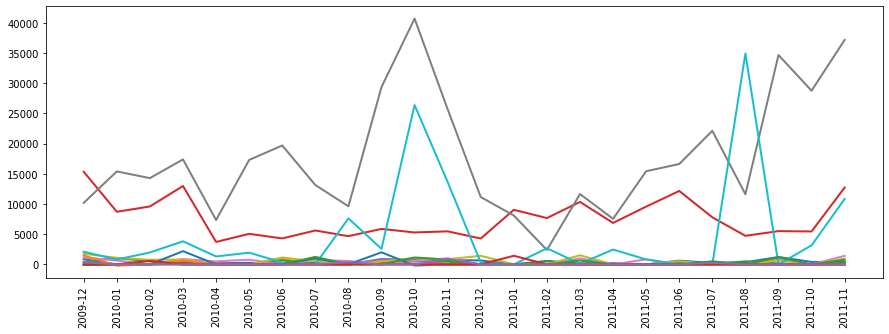

In [18]:
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['lines.linewidth'] = 2

for i in range(20,35):
    #print(newdf.iloc[i, 1:])
    plt.plot(newdf.iloc[i,1:])
    plt.xticks(rotation=90)

In [19]:
newdf.sum()[1:]

2009-12    1.089206e+06
2010-01    8.752202e+05
2010-02    8.045341e+05
2010-03    1.045142e+06
2010-04    9.207129e+05
2010-05    9.204911e+05
2010-06    9.384945e+05
2010-07    9.254608e+05
2010-08    9.656781e+05
2010-09    1.284558e+06
2010-10    1.586509e+06
2010-11    1.862892e+06
2010-12    9.114152e+05
2011-01    7.816576e+05
2011-02    7.186312e+05
2011-03    9.546507e+05
2011-04    7.016174e+05
2011-05    1.067569e+06
2011-06    1.001323e+06
2011-07    9.456353e+05
2011-08    1.014879e+06
2011-09    1.533438e+06
2011-10    1.605956e+06
2011-11    1.859245e+06
dtype: float64

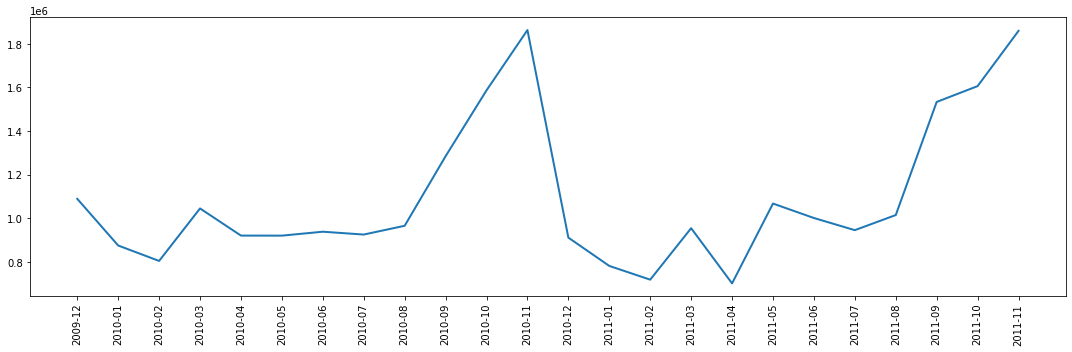

In [20]:
plt.plot(newdf.sum()[1:])
plt.xticks(rotation=90)
plt.tight_layout()